In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 25.6 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [3]:
from ultralytics import YOLO


In [4]:
model = YOLO("yolov8x.pt")


100%|██████████| 131M/131M [00:00<00:00, 366MB/s]


In [5]:
!cp -r "/kaggle/input/laboro-tomato/train" "/kaggle/working/train"

In [6]:
!cp -r "/kaggle/input/laboro-tomato/val" "/kaggle/working/val"


In [7]:
data = """
names:
  - b_fully_ripened
  - b_half_ripened
  - b_green
  - l_fully_ripened
  - l_half_ripened
  - l_green
nc: 6
path: /kaggle/working/
train: train/images
val: val/images
"""

# Specify the file path where you want to save the text
file_path = "/kaggle/working/dataset.yaml"

# Open the file in write mode and write the text
with open(file_path, "w") as file:
        file.write(data)

print("ready")

ready


In [8]:
results = model.train(data='/kaggle/working/dataset.yaml', epochs=100, imgsz=640, model="yolov8x.pt",batch=16)


Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 40.3MB/s]
2024-03-09 14:50:20,032	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-09 14:50:20,850	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-09 14:50:22.807503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 14:50:22.807606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 14:50:22.908866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 151MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<00:00, 882.50it/s]

train: New cache created: /kaggle/working/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/val/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 872.27it/s]


val: New cache created: /kaggle/working/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      16.4G     0.7853       2.05      1.046         52        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


                   all        161       1996      0.314      0.598      0.308       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      16.1G      0.718      1.019     0.9892         38        640: 100%|██████████| 41/41 [01:02<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        161       1996      0.291      0.397      0.199      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.9G     0.7422      1.005      1.002         83        640: 100%|██████████| 41/41 [01:02<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]


                   all        161       1996      0.394      0.412      0.341      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        16G     0.7432     0.9229      1.003         48        640: 100%|██████████| 41/41 [01:02<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        161       1996      0.567      0.547      0.546      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      16.1G     0.7351     0.8328     0.9912         45        640: 100%|██████████| 41/41 [01:01<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        161       1996      0.643      0.619      0.663      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.5G     0.7192     0.8219     0.9814         77        640: 100%|██████████| 41/41 [01:02<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        161       1996      0.719      0.695      0.744      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        14G     0.7191     0.8318     0.9952         87        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


                   all        161       1996      0.686      0.651      0.708      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.8G      0.701     0.7678     0.9806         40        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        161       1996      0.736       0.67      0.741      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.9G       0.68     0.7644     0.9696         70        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]


                   all        161       1996      0.695      0.759      0.801      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.9G     0.6655     0.7241     0.9583         88        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        161       1996      0.727       0.72      0.762      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.9G     0.6629     0.7314     0.9659         37        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        161       1996      0.754      0.715      0.794       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.8G     0.6497     0.7317      0.947         58        640: 100%|██████████| 41/41 [01:00<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        161       1996      0.734      0.749      0.804      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.9G     0.6351     0.6709     0.9511         87        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996       0.51      0.621       0.57      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.9G     0.6318     0.6573     0.9395         58        640: 100%|██████████| 41/41 [00:59<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]


                   all        161       1996      0.755      0.744      0.826      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        13G     0.6317      0.651     0.9401         42        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        161       1996      0.774      0.777      0.841      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.9G      0.616     0.6259      0.929         48        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        161       1996      0.779      0.756      0.816      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.9G     0.6176     0.6324     0.9351         63        640: 100%|██████████| 41/41 [00:59<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        161       1996      0.719      0.759      0.816      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.9G     0.6101     0.6112     0.9271         53        640: 100%|██████████| 41/41 [00:58<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        161       1996      0.783      0.758      0.835      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        14G     0.5974      0.579     0.9278         54        640: 100%|██████████| 41/41 [00:59<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        161       1996      0.776      0.776      0.846      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        13G      0.598      0.589     0.9243         35        640: 100%|██████████| 41/41 [00:55<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996      0.797      0.792      0.866      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.9G     0.5866     0.5729     0.9198         28        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        161       1996      0.787      0.796      0.855      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.9G     0.5818     0.5584     0.9208         96        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.795      0.778      0.852      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.9G     0.5799     0.5746     0.9086         23        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996      0.784      0.771       0.85       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.8G     0.5734     0.6085     0.9191         71        640: 100%|██████████| 41/41 [00:57<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        161       1996      0.766      0.767      0.819      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.9G     0.5769     0.5466      0.913         45        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.781      0.815       0.87      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.9G      0.566     0.5496     0.9068         47        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        161       1996      0.774      0.705      0.805      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.9G     0.5701     0.5652     0.9112         37        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        161       1996      0.783      0.792      0.852      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.8G     0.5503     0.5301     0.9056         64        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        161       1996      0.801      0.776      0.843      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.9G     0.5453     0.5154     0.9063         50        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        161       1996      0.798      0.774      0.858      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.9G      0.543     0.5095     0.8958        129        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        161       1996       0.81      0.801      0.869      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.9G     0.5514      0.524     0.9011         10        640: 100%|██████████| 41/41 [00:55<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        161       1996       0.82      0.763      0.849       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.9G     0.5359     0.5117     0.8974         73        640: 100%|██████████| 41/41 [00:55<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.766      0.844      0.857      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.9G     0.5449     0.4845     0.9022         91        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.818      0.795       0.87      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.9G     0.5366     0.4867       0.89         98        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        161       1996      0.823      0.792      0.861       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        13G     0.5359     0.4685     0.8908         48        640: 100%|██████████| 41/41 [00:55<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        161       1996      0.795       0.82      0.881      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.8G     0.5267     0.4791     0.8845         95        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        161       1996      0.793      0.807      0.856      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.9G     0.5229     0.4725     0.8892         37        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        161       1996      0.811       0.78      0.861      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.9G     0.5256     0.4639     0.8888        129        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.791      0.806      0.868      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        14G     0.5289     0.4528     0.8901         20        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        161       1996      0.752      0.817      0.837      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.8G     0.5294     0.4648     0.8862         78        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.816      0.808      0.865      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.9G     0.5008     0.4468     0.8757         55        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        161       1996      0.812      0.802      0.874      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.9G     0.5079      0.436     0.8829         88        640: 100%|██████████| 41/41 [00:55<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        161       1996      0.812      0.783      0.867      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.9G      0.501     0.4309     0.8792         74        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.812      0.811      0.868      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.8G     0.5123     0.4302     0.8783         34        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        161       1996      0.832      0.803      0.872      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.9G     0.4919     0.4075     0.8719        160        640: 100%|██████████| 41/41 [00:54<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        161       1996      0.793       0.82      0.866      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.9G     0.4935     0.4086     0.8782         31        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        161       1996      0.777      0.831      0.861      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        13G      0.489     0.4121     0.8703        111        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        161       1996      0.803      0.794      0.861      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.8G     0.4809     0.4221     0.8753         42        640: 100%|██████████| 41/41 [00:55<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        161       1996      0.791      0.807      0.866      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.9G     0.4835     0.3991     0.8673         68        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996       0.82      0.766      0.858      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.9G     0.4688     0.3912     0.8711         72        640: 100%|██████████| 41/41 [00:59<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        161       1996      0.831      0.789      0.865      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.9G     0.4743     0.4056     0.8712         26        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        161       1996      0.804      0.792      0.861      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.8G     0.4678      0.393     0.8679         30        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996      0.786      0.779      0.842      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.9G     0.4754     0.3862     0.8646         47        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.796      0.764      0.847      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.9G     0.4657     0.3709     0.8584         60        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        161       1996      0.805       0.77      0.858      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        13G     0.4658     0.3769     0.8617        144        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        161       1996      0.815      0.797      0.867      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.8G     0.4648     0.3657     0.8647         74        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        161       1996      0.794      0.842      0.876      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.9G     0.4575      0.369     0.8612         58        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        161       1996      0.808      0.833      0.883      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.9G     0.4647     0.3684      0.862         59        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        161       1996      0.812      0.817      0.882      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.9G     0.4565     0.3556     0.8652         48        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        161       1996      0.804      0.824       0.88       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.8G     0.4675     0.3713     0.8642         61        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.772      0.821      0.861      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.9G     0.4603     0.3529     0.8612         55        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        161       1996      0.809      0.786      0.858      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.9G     0.4489     0.3615     0.8637         55        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        161       1996      0.821      0.808      0.873      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.9G     0.4419     0.3533     0.8551         29        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996      0.781      0.812      0.857      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.8G     0.4478     0.3427     0.8546         53        640: 100%|██████████| 41/41 [00:55<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.827      0.801      0.873      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.9G     0.4406     0.3424     0.8556         64        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        161       1996      0.804      0.799      0.876      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.9G     0.4463     0.3358     0.8596        114        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.827      0.796      0.875      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.9G     0.4453     0.3341     0.8555         80        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        161       1996      0.835      0.797      0.868      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.8G     0.4375     0.3272     0.8541         47        640: 100%|██████████| 41/41 [00:59<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996      0.813      0.799      0.865      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.9G     0.4218     0.3026     0.8458         52        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        161       1996      0.839      0.812      0.879      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.9G     0.4283     0.3027     0.8457        102        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        161       1996      0.836      0.799      0.876      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.9G     0.4268     0.3064     0.8508         72        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        161       1996      0.823      0.809       0.88      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.8G      0.421     0.3088     0.8462         76        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        161       1996      0.824      0.806      0.871      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.9G     0.4233     0.3041     0.8452        144        640: 100%|██████████| 41/41 [00:55<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        161       1996      0.841       0.79      0.874      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.9G     0.4181      0.296     0.8449         24        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.809      0.805      0.876      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.9G      0.419     0.3078     0.8459         19        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        161       1996       0.83      0.815      0.888      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.8G     0.4194     0.2913      0.847         55        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        161       1996      0.825       0.79      0.866      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.9G     0.4183     0.2898     0.8474         59        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        161       1996      0.832      0.812      0.877      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      13.9G     0.4108     0.2802     0.8413         65        640: 100%|██████████| 41/41 [00:57<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        161       1996      0.822      0.824      0.874      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.9G     0.4158     0.2826     0.8374         85        640: 100%|██████████| 41/41 [00:55<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.809      0.828      0.875      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.8G     0.4015     0.2754     0.8439         49        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        161       1996      0.848      0.817      0.883      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.9G     0.4039     0.2837     0.8451         89        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        161       1996      0.835      0.813      0.882      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.9G     0.4111     0.2881     0.8431        208        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        161       1996      0.842        0.8      0.876      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.9G     0.3827     0.2649     0.8367         25        640: 100%|██████████| 41/41 [00:58<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        161       1996      0.838      0.827      0.883      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.8G     0.4028     0.2727     0.8415         96        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        161       1996      0.836      0.817      0.876      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.9G     0.3918     0.2781     0.8379         37        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.825      0.828      0.873      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.9G     0.4001      0.264     0.8376         99        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        161       1996      0.832      0.818      0.879      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.9G     0.3981     0.2755     0.8366         59        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        161       1996      0.808      0.833      0.872      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.9G     0.3857     0.2659     0.8346         47        640: 100%|██████████| 41/41 [00:56<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        161       1996      0.822      0.822      0.873      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.9G     0.3758     0.2514     0.8314         74        640: 100%|██████████| 41/41 [00:58<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        161       1996      0.851       0.81      0.877       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.9G     0.3883     0.2615     0.8342         95        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        161       1996      0.801       0.84      0.862      0.766


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.9G     0.3593     0.2447     0.8121         53        640: 100%|██████████| 41/41 [01:17<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        161       1996       0.85      0.784      0.857      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.8G     0.3524     0.2326      0.815         26        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        161       1996      0.812      0.827      0.865      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.9G     0.3458     0.2218     0.8081         15        640: 100%|██████████| 41/41 [00:56<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        161       1996      0.792      0.847       0.87      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.9G     0.3486     0.2299     0.8057         21        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.816      0.825      0.864      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.9G     0.3405     0.2061     0.8047         56        640: 100%|██████████| 41/41 [00:55<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        161       1996      0.821      0.814      0.867      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.8G     0.3397     0.2108     0.8075         12        640: 100%|██████████| 41/41 [00:54<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        161       1996        0.8      0.842      0.869      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.9G     0.3369      0.208     0.8081         45        640: 100%|██████████| 41/41 [00:58<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        161       1996      0.801      0.835      0.866      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.9G     0.3348     0.2232     0.8047         42        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        161       1996      0.834       0.81      0.867      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.9G     0.3349     0.2037     0.8069         42        640: 100%|██████████| 41/41 [00:56<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        161       1996       0.81      0.845      0.873       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.8G     0.3367     0.2024     0.8077         54        640: 100%|██████████| 41/41 [00:57<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        161       1996      0.801      0.849      0.873      0.779



100 epochs completed in 1.898 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]


                   all        161       1996      0.846      0.816      0.883      0.789
       b_fully_ripened        161         72      0.819      0.819      0.837      0.777
        b_half_ripened        161        116      0.825      0.772      0.868      0.776
               b_green        161        387      0.914      0.876      0.946       0.85
       l_fully_ripened        161        269      0.808      0.858      0.896      0.803
        l_half_ripened        161        223      0.814      0.728      0.833      0.753
               l_green        161        929      0.898      0.844      0.918      0.776
Speed: 1.0ms preprocess, 22.2ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/train


In [9]:
!zip -r "/kaggle/working/train" "/kaggle/working/runs" "/kaggle/working/val" "/kaggle/working/dataset.yaml" "/kaggle/working/yolov8x.pt" "/kaggle/working/yolov8n.pt"


  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/results.png (deflated 8%)
  adding: kaggle/working/runs/detect/train/results.csv (deflated 85%)
  adding: kaggle/working/runs/detect/train/train_batch0.jpg (deflated 2%)
  adding: kaggle/working/runs/detect/train/F1_curve.png (deflated 8%)
  adding: kaggle/working/runs/detect/train/train_batch3691.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: kaggle/working/runs/detect/train/R_curve.png (deflated 8%)
  adding: kaggle/working/runs/detect/train/P_curve.png (deflated 8%)
  adding: kaggle/working/runs/detect/train/val_batch2_labels.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/train/args.yaml (deflated 52%)
  adding: kaggle/working/runs/detect/train/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/last.pt (deflated

In [10]:
!rm out.zip full.zip


rm: cannot remove 'out.zip': No such file or directory
rm: cannot remove 'full.zip': No such file or directory


In [11]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))
 

In [12]:
download_file('/kaggle/working/full.zip', 'out')


Unable to run zip command!



In [13]:
from ultralytics import YOLO
import PIL

# Load a model
custom = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
result = custom(save=True, conf=0.5, source="/kaggle/input/laboro-tomato/val/images/IMG_0991.jpg")  # predict on an image


image 1/1 /kaggle/input/laboro-tomato/val/images/IMG_0991.jpg: 640x480 3 b_fully_ripeneds, 1 b_half_ripened, 3 b_greens, 67.8ms
Speed: 3.2ms preprocess, 67.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


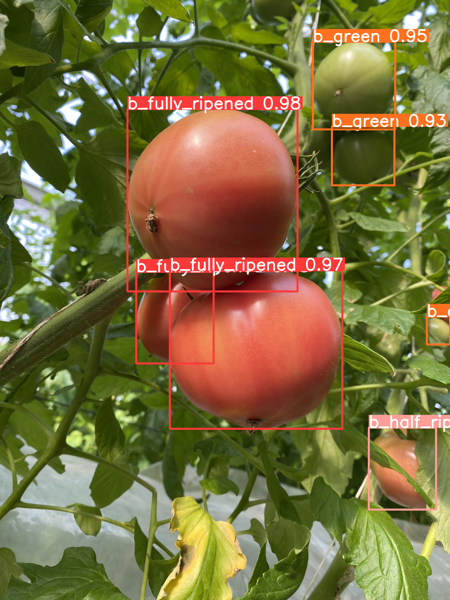

In [14]:
from PIL import Image
from IPython.display import display

# Open the image
image = Image.open("/kaggle/working/runs/detect/predict/IMG_0991.jpg")

# Specify the size you want for the displayed image
desired_size = (700, 600)  # Replace with the desired width and height

# Create a thumbnail with the specified size
image.thumbnail(desired_size)

# Display the image
display(image)

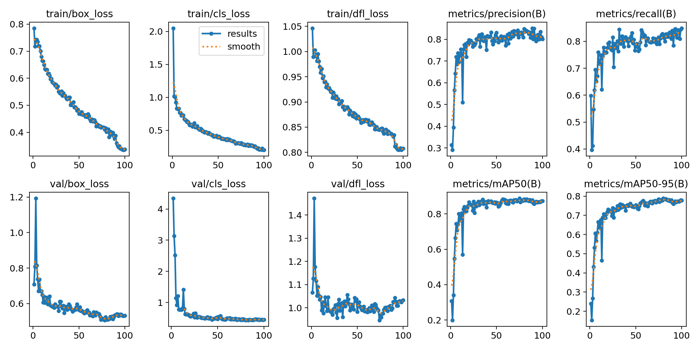

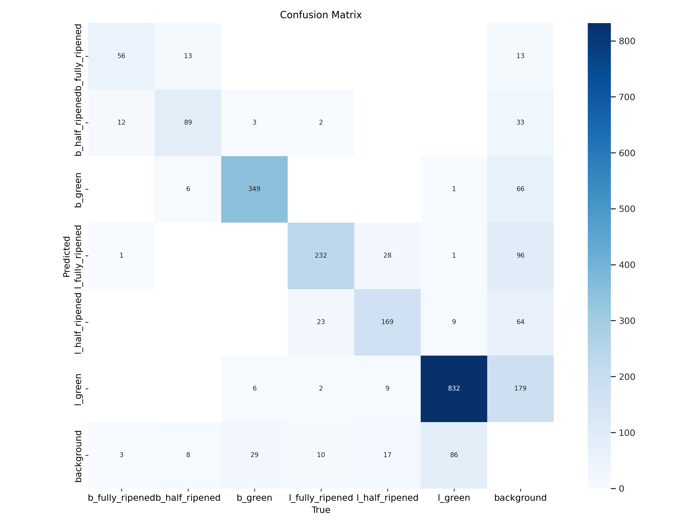

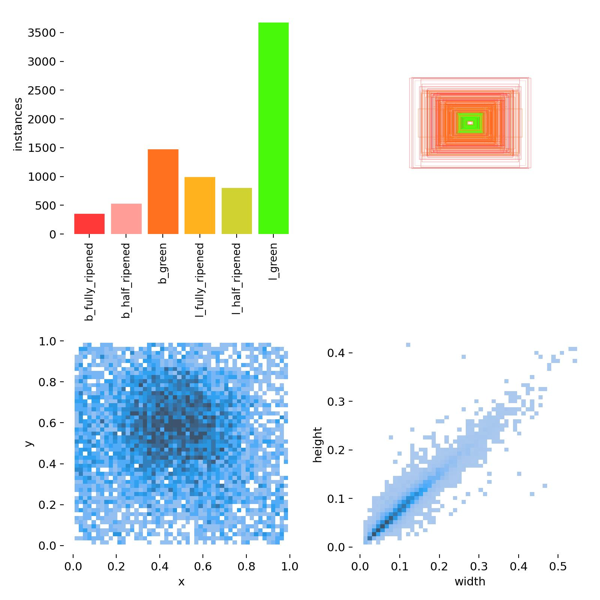

In [15]:
from PIL import Image
from IPython.display import display

def display_images(image_paths, desired_size=(700, 600)):
    for path in image_paths:
        image = Image.open(path)
        image.thumbnail(desired_size)
        display(image)

# List of image paths
image_paths = ["/kaggle/working/runs/detect/train/results.png",
               "/kaggle/working/runs/detect/train/confusion_matrix.png",
               "/kaggle/working/runs/detect/train/labels.jpg"]

# Display all images with the specified size
display_images(image_paths)